/Users/santhoshkumarayyalasomayazula/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [23:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


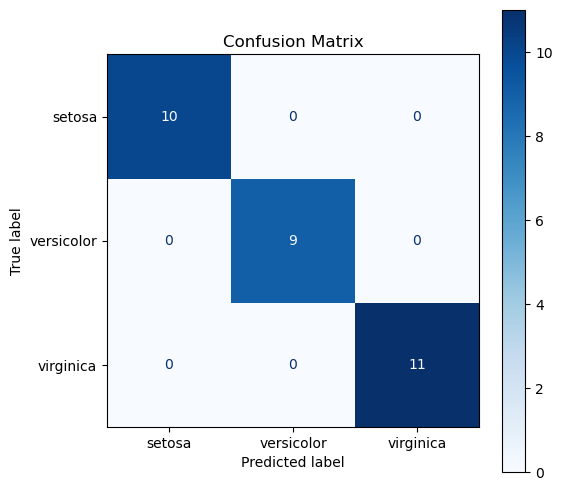

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import mlflow
from mlflow.models import infer_signature
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Load the Iris dataset
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    data["data"], data["target"], test_size=0.2, random_state=42
)

# Initialize XGBClassifier
xgb_classifier = XGBClassifier(
    n_estimators=7,
    max_depth=3,
    learning_rate=1,
    objective="multi:softprob",  # Corrected for multi-class classification
    random_state=123,
)

# Start an MLflow experiment
with mlflow.start_run():
    # Fit model
    xgb_classifier.fit(X_train, y_train)

    # Log classifier parameters
    clf_params = xgb_classifier.get_xgb_params()
    mlflow.log_params(clf_params)
    mlflow.log_param("test_size", 0.2)

    # Log metrics
    y_pred = xgb_classifier.predict(X_test)
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_metric("precision", precision_score(y_test, y_pred, average='macro'))
    mlflow.log_metric("recall", recall_score(y_test, y_pred, average='macro'))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred, average='macro'))

    # Log model
    signature = infer_signature(X_train, y_pred)
    mlflow.xgboost.log_model(xgb_classifier, "iris-classifier", signature=signature)

    # Log artifacts: Create and save a confusion matrix plot
    fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figure size as needed
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
    disp.plot(cmap='Blues', ax=ax)
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")


# Load the saved model using the model URI saved during logging
xgb_classifier_saved = mlflow.pyfunc.load_model(model_info.model_uri)

# Make predictions on the test dataset
y_pred = xgb_classifier_saved.predict(X_test)


# Start MLflow UI locally to view the experiments
# In your terminal: mlflow ui

In [2]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.9 MB/s eta 0:00:0000:0100:01
